# 面膜数据分析

**导入库并且对数据进行去处理**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np#解决中文显示问题
from pylab import *
from numpy import median
mpl.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

**查看数据类型和抬头**

In [35]:
mask = pd.read_csv('mask.csv',encoding="gbk")   #数据来源狗熊会
print(mask.head())
mask.info()
print(mask['产地'].unique())
print(mask['店铺所在地'].unique())
print(mask['适合肤质'].unique())
#店铺所在地为“英国”或“新加坡”的数据，更改为“海外”
mask.loc[mask.店铺所在地 == '英国','店铺所在地']= '海外'
mask.loc[mask.店铺所在地 == '新加坡','店铺所在地'] = '海外'
print(mask['店铺所在地'].unique())
mask.loc[mask.产地 == '其他/other','产地'] = '其他'
mask.loc[mask.适合肤质 != '任何肤质','适合肤质'] = '其他'

       名称     价格   月销量    评价数 店铺所在地  适合肤质  产地  补水保湿  美白提亮  控油祛痘  清洁毛孔  提拉紧致
0  ANGLEE  254.0    40   3133    湖南  任何肤质  中国     1     1     0     0     0
1  ANGLEE  350.0    62    876    浙江  任何肤质  中国     1     1     0     0     0
2  ANGLEE  284.9    12     16    浙江  任何肤质  中国     1     0     1     1     0
3      BF  289.0    32    175    英国  任何肤质  中国     1     0     0     0     0
4     BSR  379.9  1407  13870    安徽  任何肤质  中国     1     0     0     0     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 12 columns):
名称       794 non-null object
价格       794 non-null float64
月销量      794 non-null int64
评价数      794 non-null int64
店铺所在地    794 non-null object
适合肤质     794 non-null object
产地       794 non-null object
补水保湿     794 non-null int64
美白提亮     794 non-null int64
控油祛痘     794 non-null int64
清洁毛孔     794 non-null int64
提拉紧致     794 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 74.5+ KB
['中国' '日本' '韩国' '美国' '英国' '其他/othe

## 整体数据分析

**整体月销量直方分布**

C:\Users\LiJiaYi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


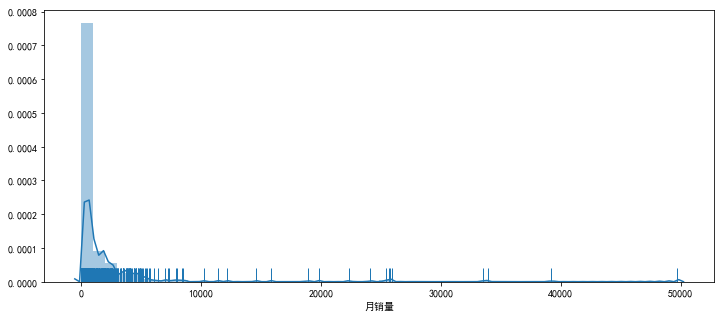

In [3]:
plt.figure(figsize=(12,5))
sns.distplot(mask['月销量'],rug=True) #去除直方hist=False

**整体价格分布直方图**

C:\Users\LiJiaYi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


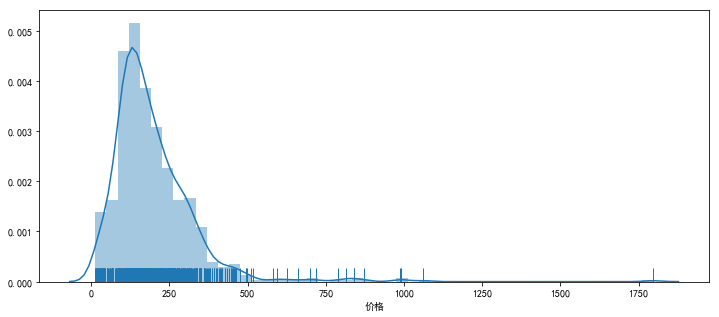

In [36]:
plt.figure(figsize=(12,5))
sns.distplot(mask['价格'],rug=True)    #去除核密度曲线kde=False

**整体评价数分布直方图**

C:\Users\LiJiaYi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


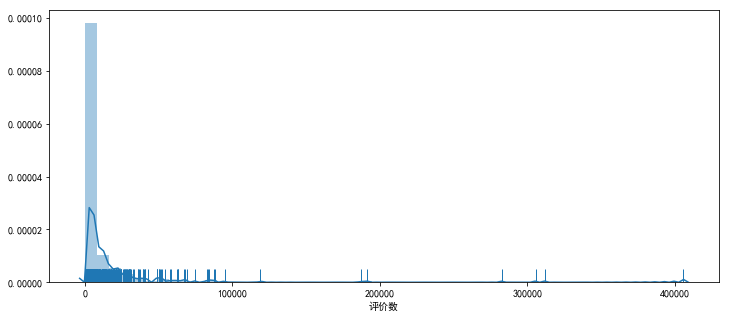

In [37]:
plt.figure(figsize=(12,5))
sns.distplot(mask['评价数'],rug=True) 

**店铺所在地计数柱形图**

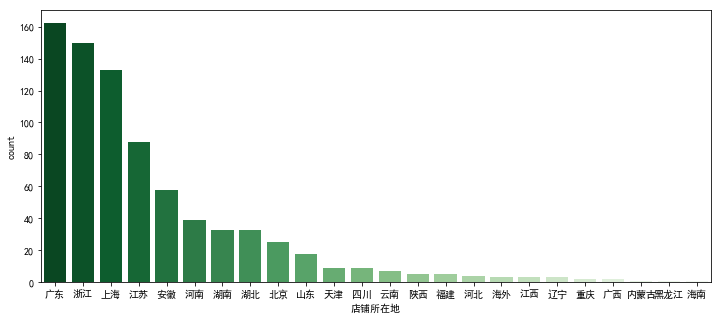

In [38]:
plt.figure(figsize=(12,5))
sns.countplot('店铺所在地',data=mask,
              order = mask['店铺所在地'].value_counts().index,palette='Greens_r')

**产地计数柱形图**

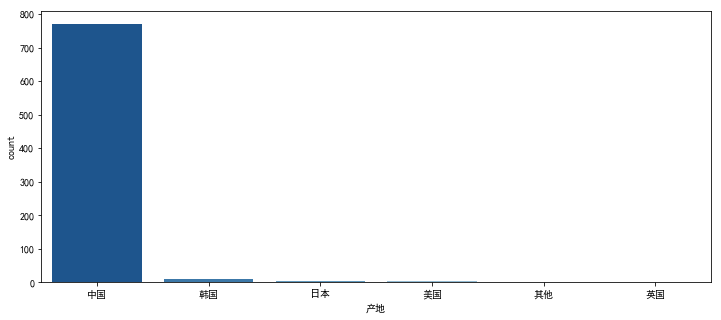

In [8]:
plt.figure(figsize=(12,5))
sns.countplot('产地',data=mask,
              order = mask['产地'].value_counts().index,palette='Blues_r')

**产品计数柱形图（前十）**

韩后     41
美肤宝    36
自然堂    31
温碧泉    29
春纪     26
韩束     24
欧诗漫    24
珀莱雅    24
柏氏     24
丸美     19
Name: 名称, dtype: int64


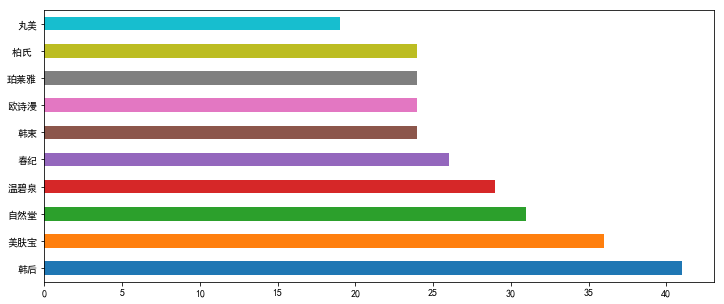

In [8]:
plt.figure(figsize=(12,5))
n_counts =  mask['名称'].value_counts()
print(n_counts[:10])
 
#绘制前10， kind 为barh，
n_counts[:10].plot(kind = 'barh', rot = 0)
plt.show()

**价格影响因素**

C:\Users\LiJiaYi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


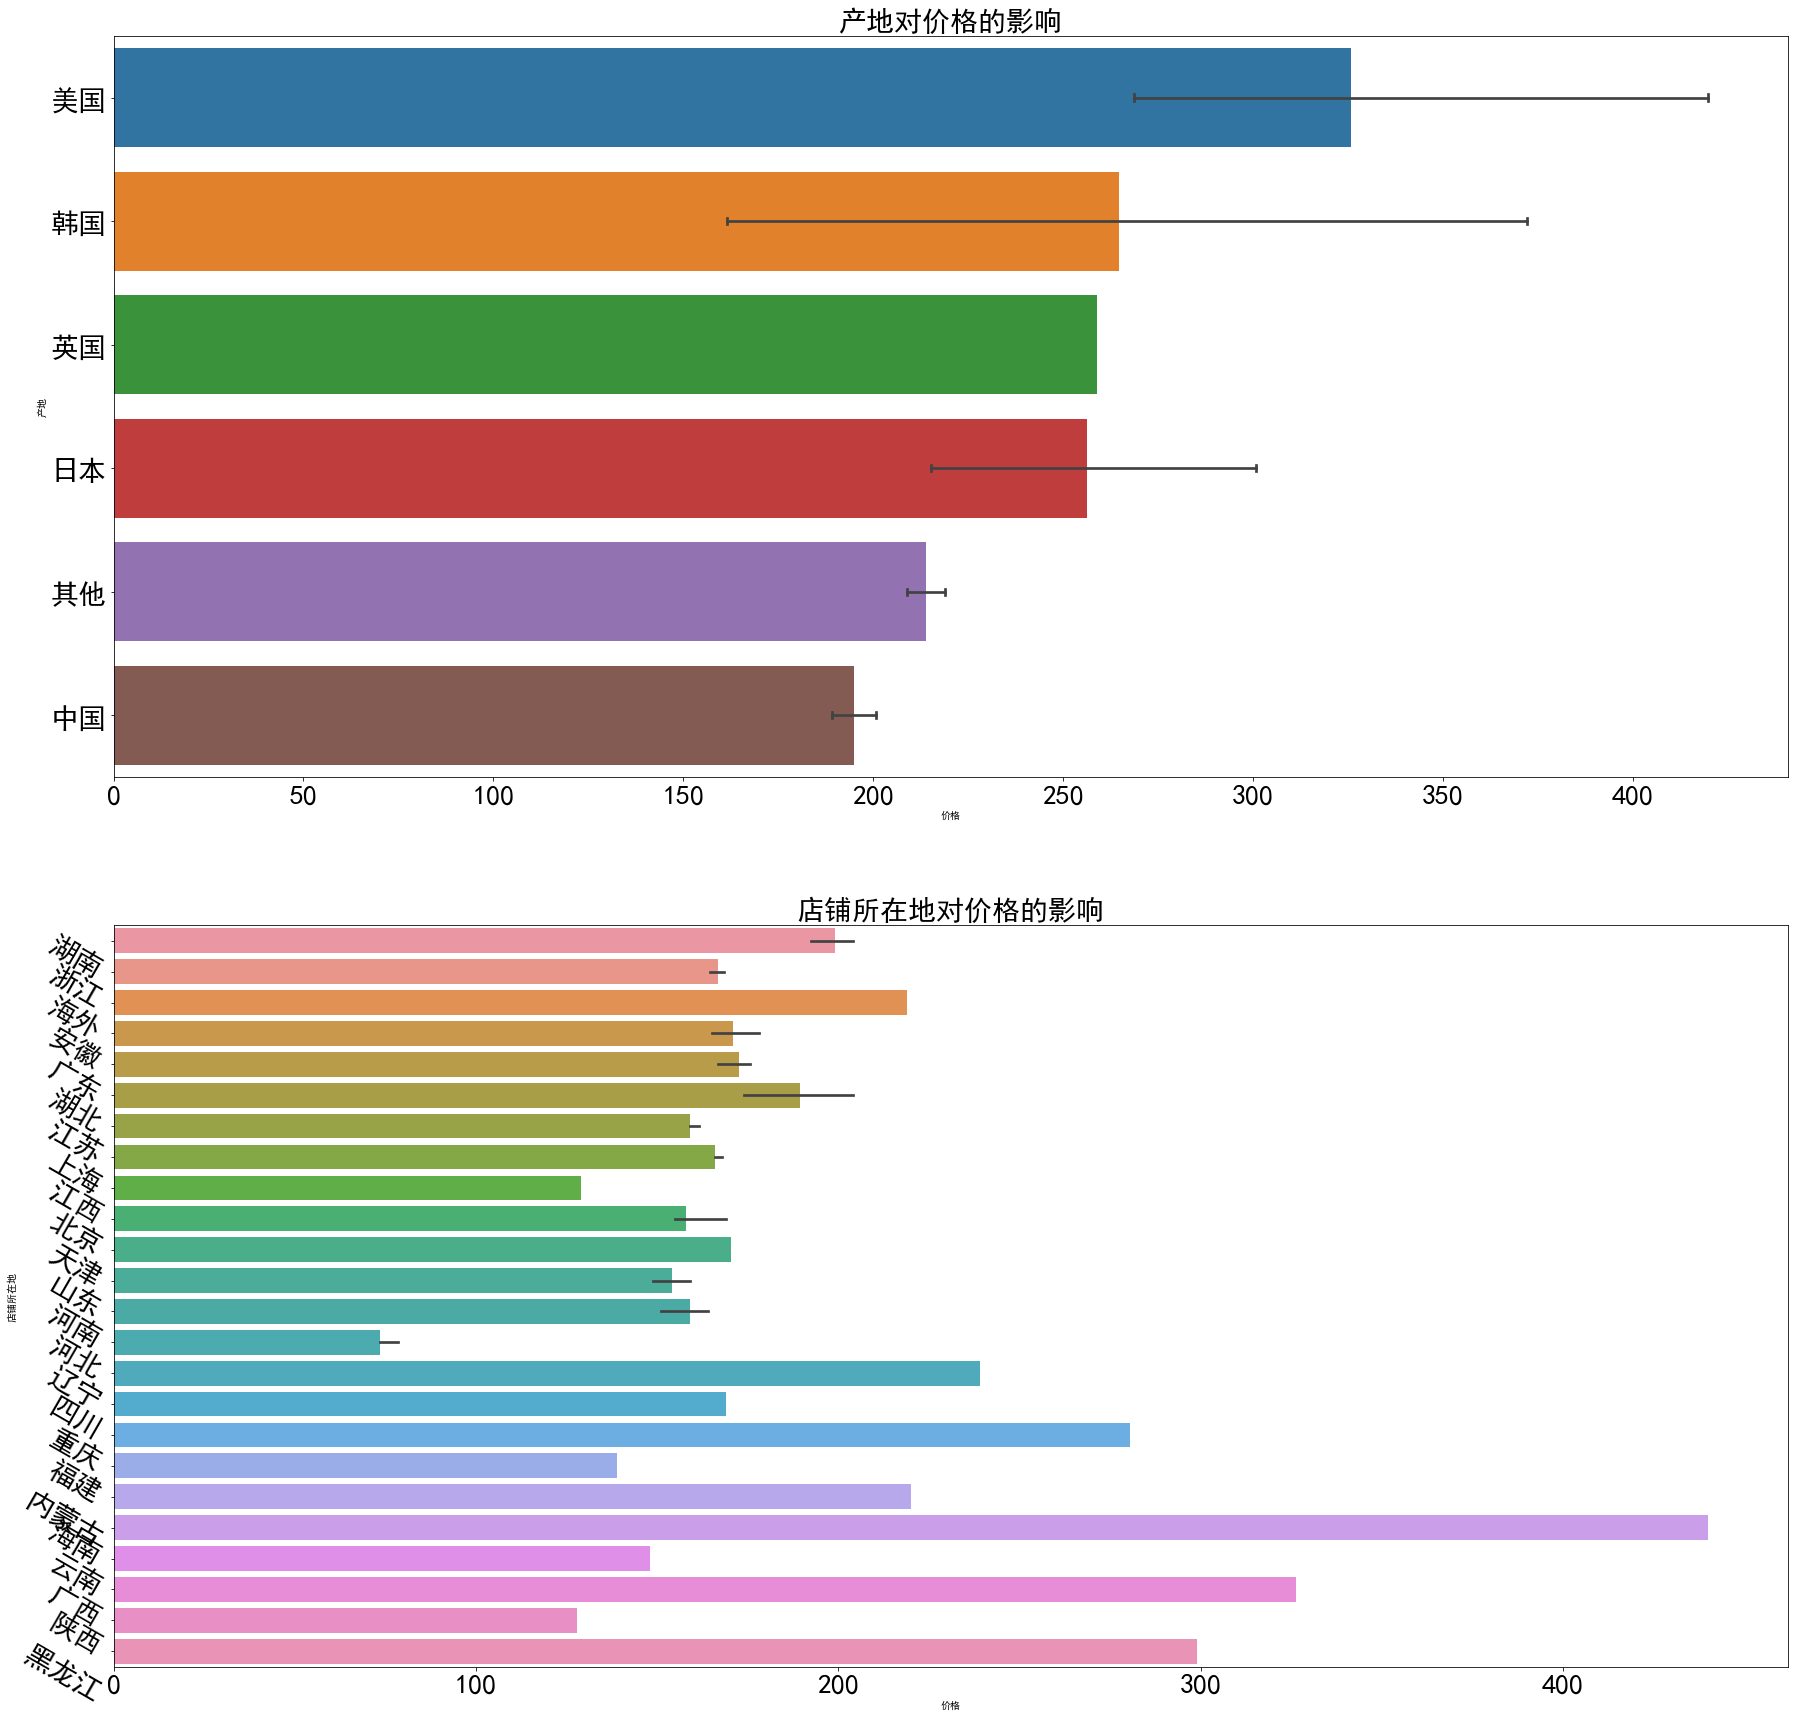

In [33]:
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(2,1,1)
sns.barplot(y="产地", x="价格",data=mask, estimator=mean,ci=75,
            order=['美国', '韩国','英国','日本', '其他','中国'],capsize = 0.05) 
plt.title('产地对价格的影响',fontsize=28)
ax.tick_params(axis='both',labelsize=28)

ax=fig.add_subplot(2,1,2)
sns.barplot(y="店铺所在地", x="价格", data=mask, estimator=median,ci=20)
plt.yticks(rotation=-30) #旋转标签
plt.title('店铺所在地对价格的影响',fontsize=28)
ax.tick_params(axis='both',labelsize=28)

'''
ax=fig.add_subplot(3,1,3)
sns.barplot(y="名称", x="价格", data=mask, estimator=median,ci=20)
plt.yticks(rotation=-30) #旋转标签
plt.title('产品种类对价格的影响')
'''
plt.show()

**月销量影响因素**

C:\Users\LiJiaYi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


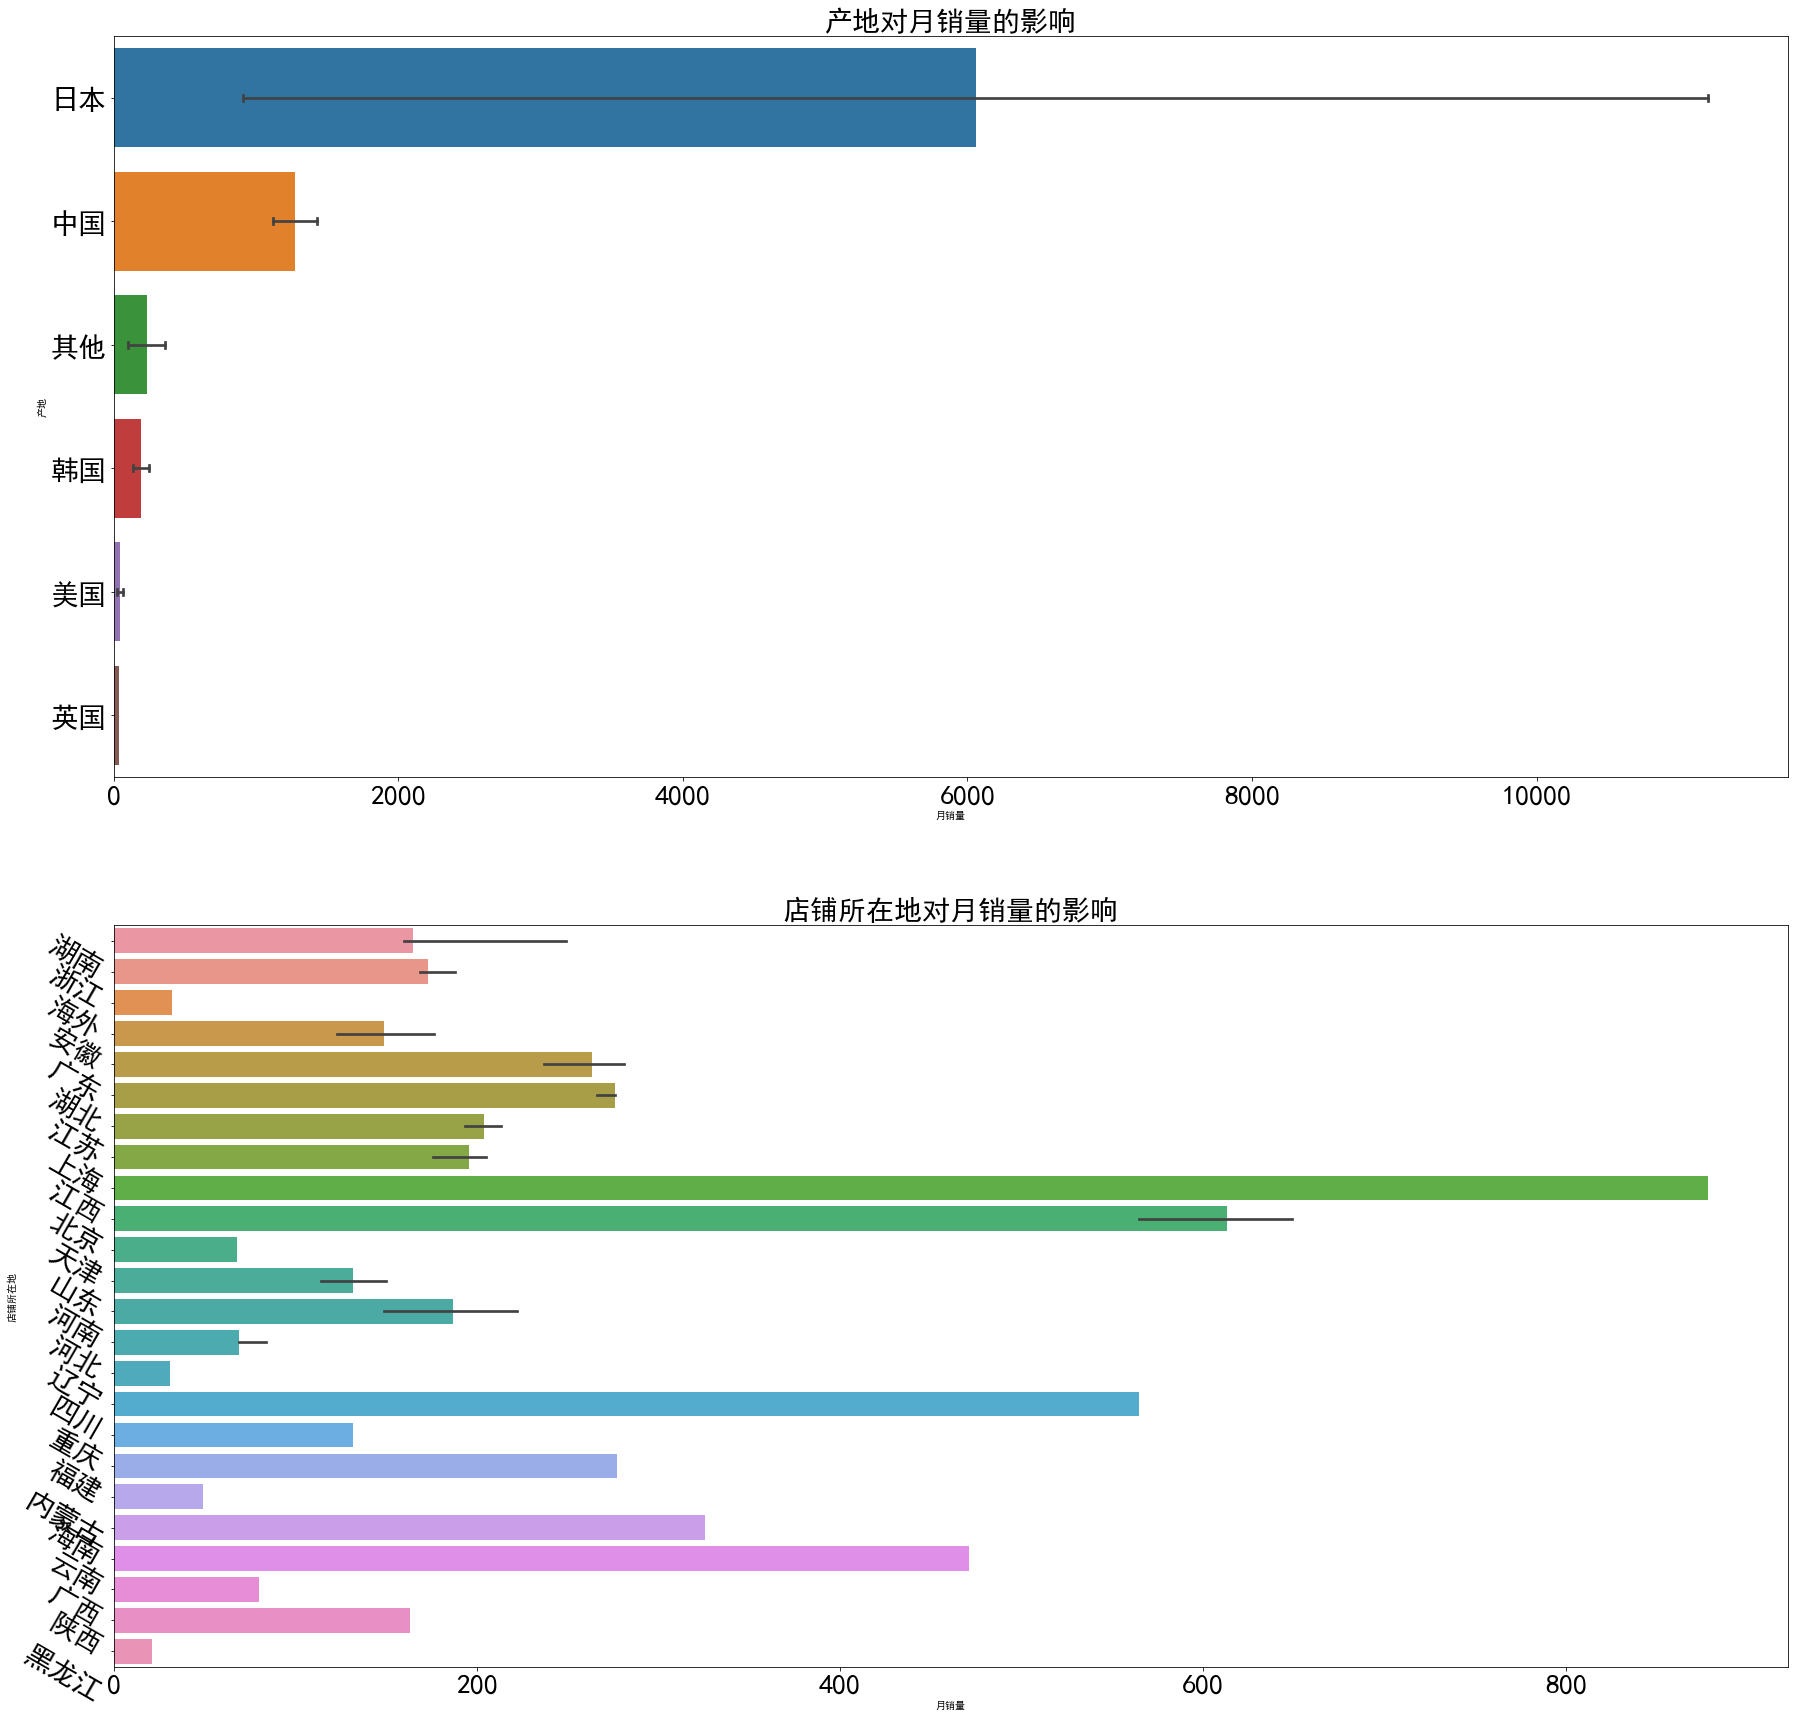

In [24]:
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(2,1,1)
sns.barplot(y="产地", x="月销量",data=mask, estimator=mean,ci=75,
            order=['日本', '中国','其他', '韩国','美国','英国'],capsize = 0.05) 
plt.title('产地对月销量的影响',fontsize=28)
ax.tick_params(axis='both',labelsize=28)

ax=fig.add_subplot(2,1,2)
sns.barplot(y="店铺所在地", x="月销量", data=mask, estimator=median,ci=20)
plt.yticks(rotation=-30) #旋转标签
plt.title('店铺所在地对月销量的影响',fontsize=28)
ax.tick_params(axis='both',labelsize=28)

#plt.savefig('bar.png',dpi=500)

**评价数影响因素**

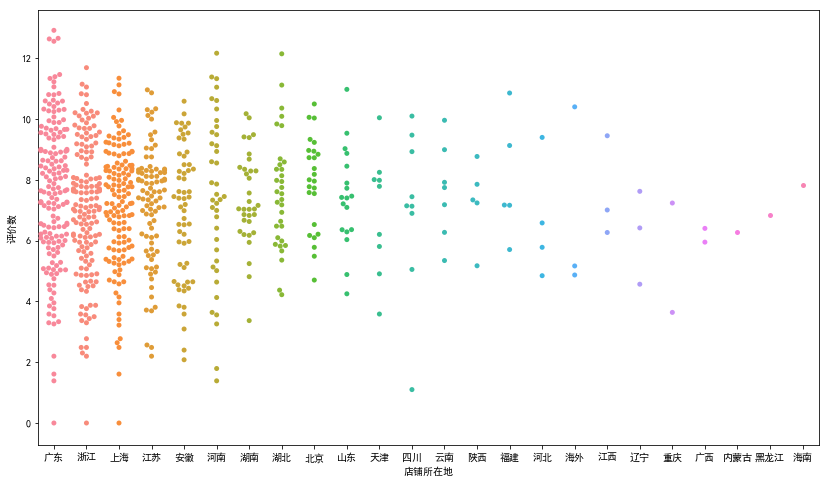

In [29]:
'''美化版小提琴图'''
#help(sns.swarmplot)

plt.figure(figsize=(14,8))
sns.swarmplot(x = '店铺所在地', y=log(mask['评价数']),
              data = mask,order = mask['店铺所在地'].value_counts().index)

**有关肤质**

C:\Users\LiJiaYi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


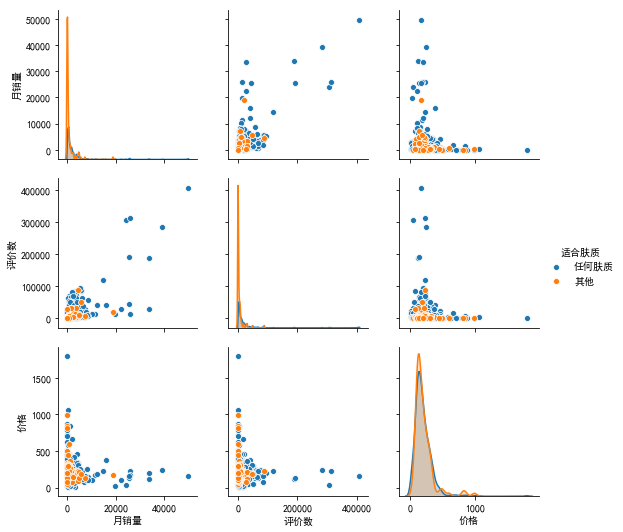

In [39]:
sns.pairplot(mask[['月销量','评价数','价格','适合肤质']],hue='适合肤质')

**有关功效**

([<matplotlib.axis.XTick at 0x1c7d5dc3278>,
 <a list of 5 Text xticklabel objects>)

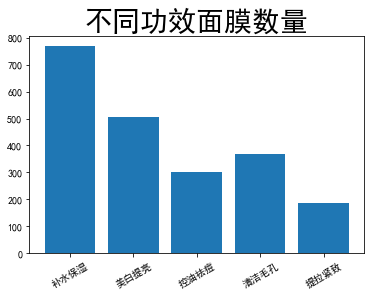

In [58]:
ydata=[mask.补水保湿.sum(),mask.美白提亮.sum(),mask.控油祛痘.sum(),mask.清洁毛孔.sum(),mask.提拉紧致.sum()]
xdata=[1,2,3,4,5]
plt.bar(xdata,ydata) 
plt.title('不同功效面膜数量',fontsize=28)
xticks([1,2,3,4,5],['补水保湿','美白提亮','控油祛痘','清洁毛孔','提拉紧致'],rotation=30)

769
